In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [2]:
h_data = pd.read_csv("/Users/zeel/Desktop/research/GLINT_1.0.4/houseman_estimates.txt",delimiter=" ")
h_data.head()

,ID,CD4+,CD8+,mono,Bcells,NK,Nue,Eos
0,CHINFAM-11,0.184082,0.200675,0.042691,0.076032,0.016462,0.480054,0.000003
1,CHINFAM-19,0.106372,0.044679,0.017786,0.018260,0.047409,0.765489,0.000004
2,CHINFAM-22,0.141655,0.221334,0.046951,0.040922,0.082415,0.466721,0.000003
3,CHINFAM-33,0.125805,0.068628,0.045031,0.014951,0.027166,0.718412,0.000007
4,CHINFAM-45,0.097219,0.113603,0.003153,0.039283,0.085683,0.661057,0.000002


In [3]:
data = pd.read_csv("/Users/zeel/Desktop/research/validation_data.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,CHINFAM-01: Blood_SCZ_Famine1,CHINFAM-02: Blood_CTR_Non_Famine1,CHINFAM-03: Blood_SCZ_Non_Famine1,CHINFAM-04: Blood_CTR_Non_Famine2,CHINFAM-05: Blood_SCZ_Non_Famine2,CHINFAM-06: Blood_CTR_Non_Famine3,CHINFAM-07: Blood_SCZ_Famine2,CHINFAM-08: Blood_SCZ_Non_Famine3,CHINFAM-09: Blood_CTR_Non_Famine4,CHINFAM-10: Blood_SCZ_Non_Famine4,...,CHINFAM-144: Blood_CTR_Famine23,CHINFAM-145: Blood_SCZ_Non_Famine48,CHINFAM-146: Blood_SCZ_Non_Famine49,CHINFAM-147: Blood_SCZ_Non_Famine50,CHINFAM-148: Blood_CTR_Famine24,CHINFAM-149: Blood_CTR_Non_Famine52,CHINFAM-150: Blood_CTR_Non_Famine53,CHINFAM-151: Blood_SCZ_Non_Famine51,CHINFAM-152: Blood_CTR_Famine25,CHINFAM-153: Blood_CTR_Non_Famine54
1,GSM3230211,GSM3230212,GSM3230213,GSM3230214,GSM3230215,GSM3230216,GSM3230217,GSM3230218,GSM3230219,GSM3230220,...,GSM3230354,GSM3230355,GSM3230356,GSM3230357,GSM3230358,GSM3230359,GSM3230360,GSM3230361,GSM3230362,GSM3230363
2,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,...,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018
3,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,...,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018
4,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,...,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018


In [4]:
data_transformed = data.T

In [5]:
sch_false = data_transformed[data_transformed[10] == "schizophrenia: FALSE"]

In [6]:
famine_list = sch_false[sch_false[11] == "famine: Yes"][0]
famine_list.head()

10    CHINFAM-11: Blood_CTR_Famine1
18    CHINFAM-19: Blood_CTR_Famine2
21    CHINFAM-22: Blood_CTR_Famine3
32    CHINFAM-33: Blood_CTR_Famine4
44    CHINFAM-45: Blood_CTR_Famine5
Name: 0, dtype: object

In [7]:
nonfamine_list = sch_false[sch_false[11] == "famine: No"][0]
nonfamine_list.head()

1     CHINFAM-02: Blood_CTR_Non_Famine1
3     CHINFAM-04: Blood_CTR_Non_Famine2
5     CHINFAM-06: Blood_CTR_Non_Famine3
8     CHINFAM-09: Blood_CTR_Non_Famine4
12    CHINFAM-13: Blood_CTR_Non_Famine5
Name: 0, dtype: object

In [8]:
famine_cleaned=[]
for i in famine_list:
    j=i.split(":")
    famine_cleaned.append(j[0])

In [9]:
nonfamine_cleaned=[]
for i in nonfamine_list:
    j=i.split(":")
    nonfamine_cleaned.append(j[0])

In [10]:
group_ids=[]
for id in h_data["ID"]:
    if id in famine_cleaned:
        group_ids.append("famine")        
    else:
        group_ids.append("nonfamine")
print(group_ids)

['famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'famine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine', 'nonfamine']


In [11]:
h_data["group_ids"]=group_ids
h_data

,ID,CD4+,CD8+,mono,Bcells,NK,Nue,Eos,group_ids
0,CHINFAM-11,0.184082,0.200675,0.042691,0.076032,0.016462,0.480054,2.531794e-06,famine
1,CHINFAM-19,0.106372,0.044679,0.017786,0.018260,0.047409,0.765489,4.062222e-06,famine
2,CHINFAM-22,0.141655,0.221334,0.046951,0.040922,0.082415,0.466721,2.513729e-06,famine
3,CHINFAM-33,0.125805,0.068628,0.045031,0.014951,0.027166,0.718412,7.222435e-06,famine
4,CHINFAM-45,0.097219,0.113603,0.003153,0.039283,0.085683,0.661057,2.308937e-06,famine
...,...,...,...,...,...,...,...,...,...
74,CHINFAM-138,0.154947,0.109915,0.029861,0.084143,0.034883,0.586250,2.374206e-07,nonfamine
75,CHINFAM-140,0.137141,0.075844,0.020404,0.045333,0.076789,0.644489,7.229273e-07,nonfamine
76,CHINFAM-149,0.100558,0.111149,0.039232,0.089726,0.001578,0.657757,2.645020e-07,nonfamine
77,CHINFAM-150,0.106641,0.161458,0.043728,0.090477,0.101034,0.496651,1.125927e-05,nonfamine


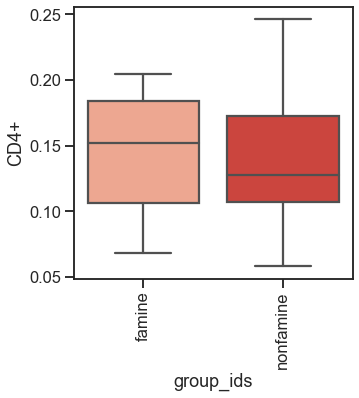

In [12]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "CD4+", data=h_data, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("CD4+")
plt.show()

In [13]:
X = h_data["CD4+"].values
Y = h_data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.622857
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                0.002101
Time:                        02:36:51   Log-Likelihood:                -49.206
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.6489
y=nonfamine       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1225      0.816      1.376      0.169      -0.476       2.721
x1             -2.4506    

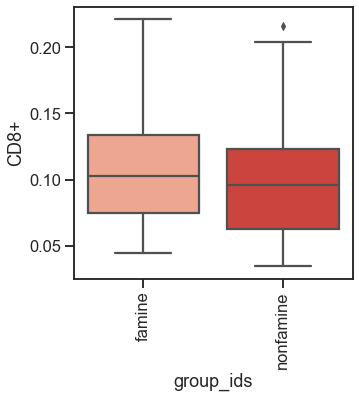

In [14]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "CD8+", data=h_data, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("CD8+")
plt.show()

In [15]:
X = h_data["CD8+"].values
Y = h_data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.611517
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                 0.02027
Time:                        02:36:51   Log-Likelihood:                -48.310
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.1574
y=nonfamine       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5591      0.623      2.502      0.012       0.338       2.780
x1             -7.5174    

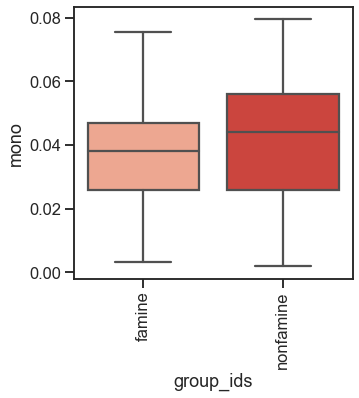

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "mono", data=h_data, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("mono")
plt.show()

In [17]:
X = h_data["mono"].values
Y = h_data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())


Optimization terminated successfully.
         Current function value: 0.622407
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                0.002822
Time:                        02:36:51   Log-Likelihood:                -49.170
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.5978
y=nonfamine       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4925      0.575      0.857      0.392      -0.634       1.619
x1              6.8545    

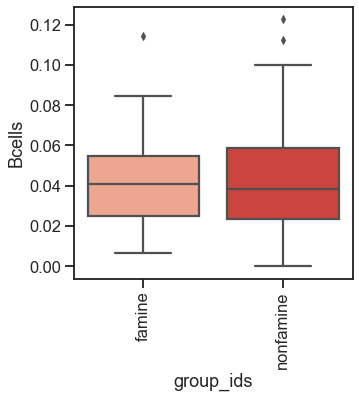

In [18]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "Bcells", data=h_data, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("Bcells")
plt.show()

In [19]:
X = h_data["Bcells"].values
Y = h_data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.624090
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:               0.0001262
Time:                        02:36:51   Log-Likelihood:                -49.303
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.9112
y=nonfamine       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8124      0.450      1.805      0.071      -0.070       1.695
x1             -0.9609    

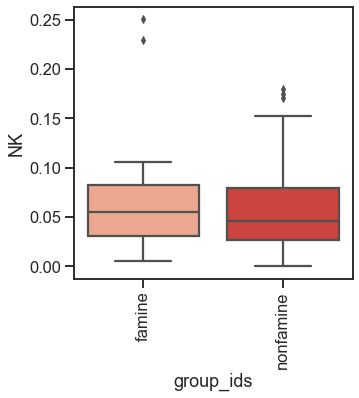

In [20]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "NK", data=h_data, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("NK")
plt.show()

In [21]:
X = h_data["NK"].values
Y = h_data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.621849
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                0.003717
Time:                        02:36:51   Log-Likelihood:                -49.126
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.5449
y=nonfamine       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9533      0.390      2.443      0.015       0.189       1.718
x1             -2.8772    

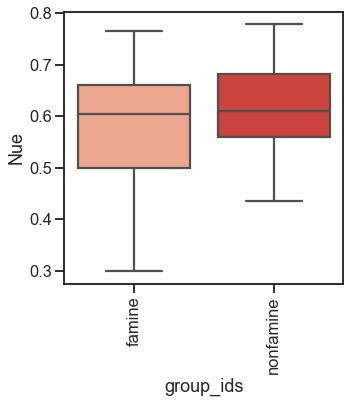

In [22]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "Nue", data=h_data, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("Nue")
plt.show()

In [23]:
X = h_data["Nue"].values
Y = h_data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.615793
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                 0.01342
Time:                        02:36:51   Log-Likelihood:                -48.648
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.2500
y=nonfamine       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0321      1.588     -0.650      0.516      -4.144       2.080
x1              2.9910    

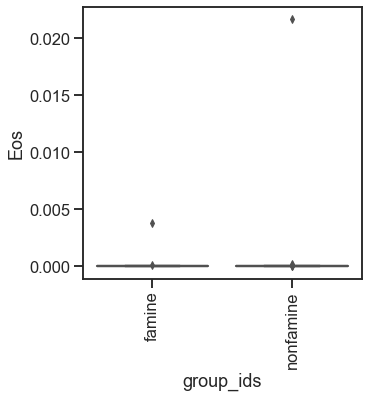

In [24]:
plt.figure(figsize=(5, 5))
sns.boxplot("group_ids", "Eos", data=h_data, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("Eos")
plt.show()

In [25]:
X = h_data["Eos"].values
Y = h_data["group_ids"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.622794
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                0.002202
Time:                        02:36:51   Log-Likelihood:                -49.201
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.6412
y=nonfamine       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7555      0.244      3.102      0.002       0.278       1.233
x1             55.9434    